#  GRIP: The Sparks Foundation

## Data Science and Business Analytics Internship

### Intern name: Ishaun Sinha

### Prediction using Decision Tree algorithm

#### Task: Create a decision tree classifier and visualise it graphically

### Importing the libraries

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
%matplotlib inline

### Reading the dataset

In [12]:
df= pd.read_csv('Iris.csv')

### Exploring the given dataset

In [13]:
df.shape

(150, 6)

In [14]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [16]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [10]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

### Checking for missing data/outliers

In [17]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

### Visualising dataset

<AxesSubplot:xlabel='PetalLengthCm', ylabel='PetalWidthCm'>

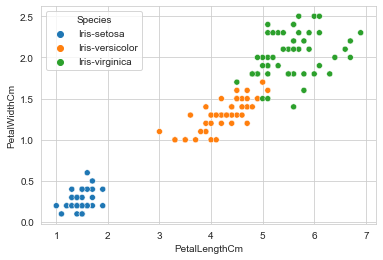

In [19]:
sb.set_style('whitegrid')
sb.scatterplot(x=df['PetalLengthCm'], y=df['PetalWidthCm'], hue=df['Species'])

<AxesSubplot:xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

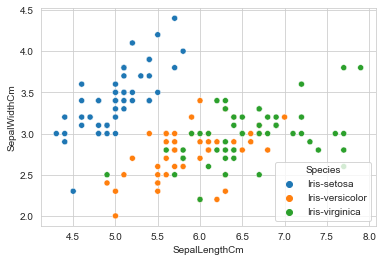

In [20]:
sb.set_style('whitegrid')
sb.scatterplot(x=df['SepalLengthCm'], y=df['SepalWidthCm'], hue=df['Species'])

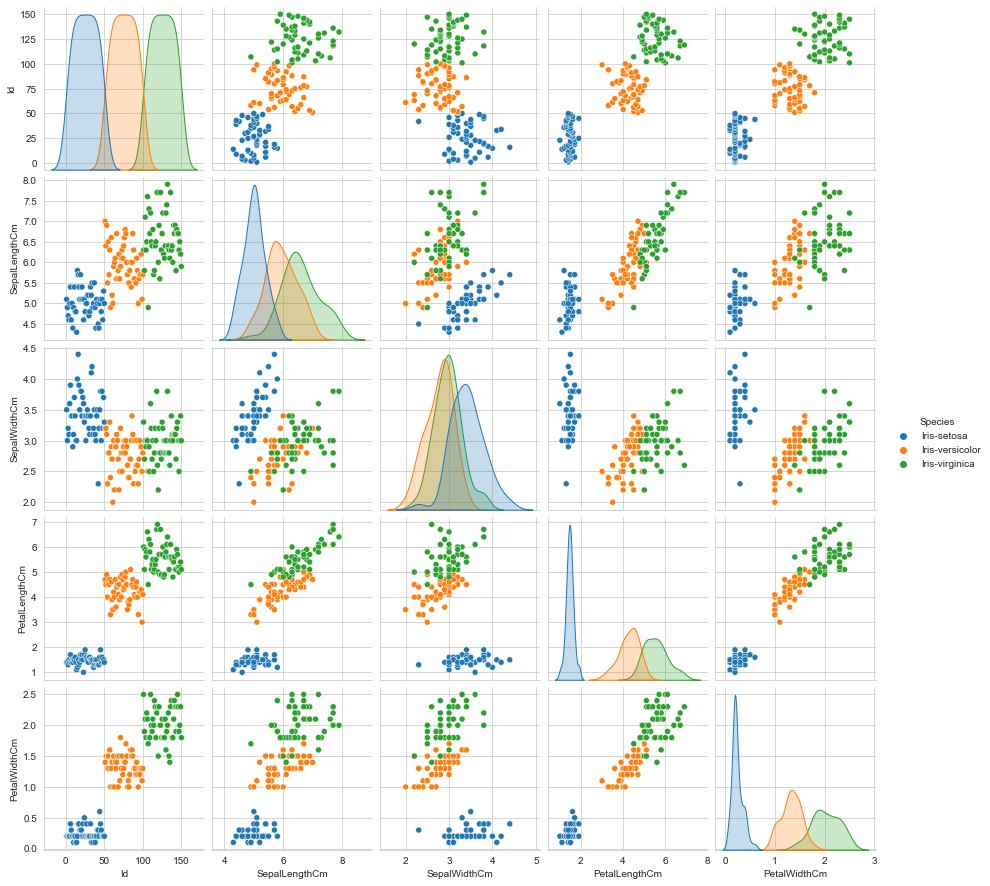

In [21]:
sb.pairplot(df, hue='Species')

### Separating dependent and independent variables


### Data encoding

In [27]:
iris_class={'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2}
df['Species']= [iris_class[i] for i in df['Species']]
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,2
146,147,6.3,2.5,5.0,1.9,2
147,148,6.5,3.0,5.2,2.0,2
148,149,6.2,3.4,5.4,2.3,2


In [28]:
X= df.drop(['Id','Species'],axis=1)
y= df['Species']

In [29]:
X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [30]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int64

### Model definning and Fitting

In [31]:
model= DecisionTreeClassifier()
model.fit(X,y)

DecisionTreeClassifier()

### Visualising the Model

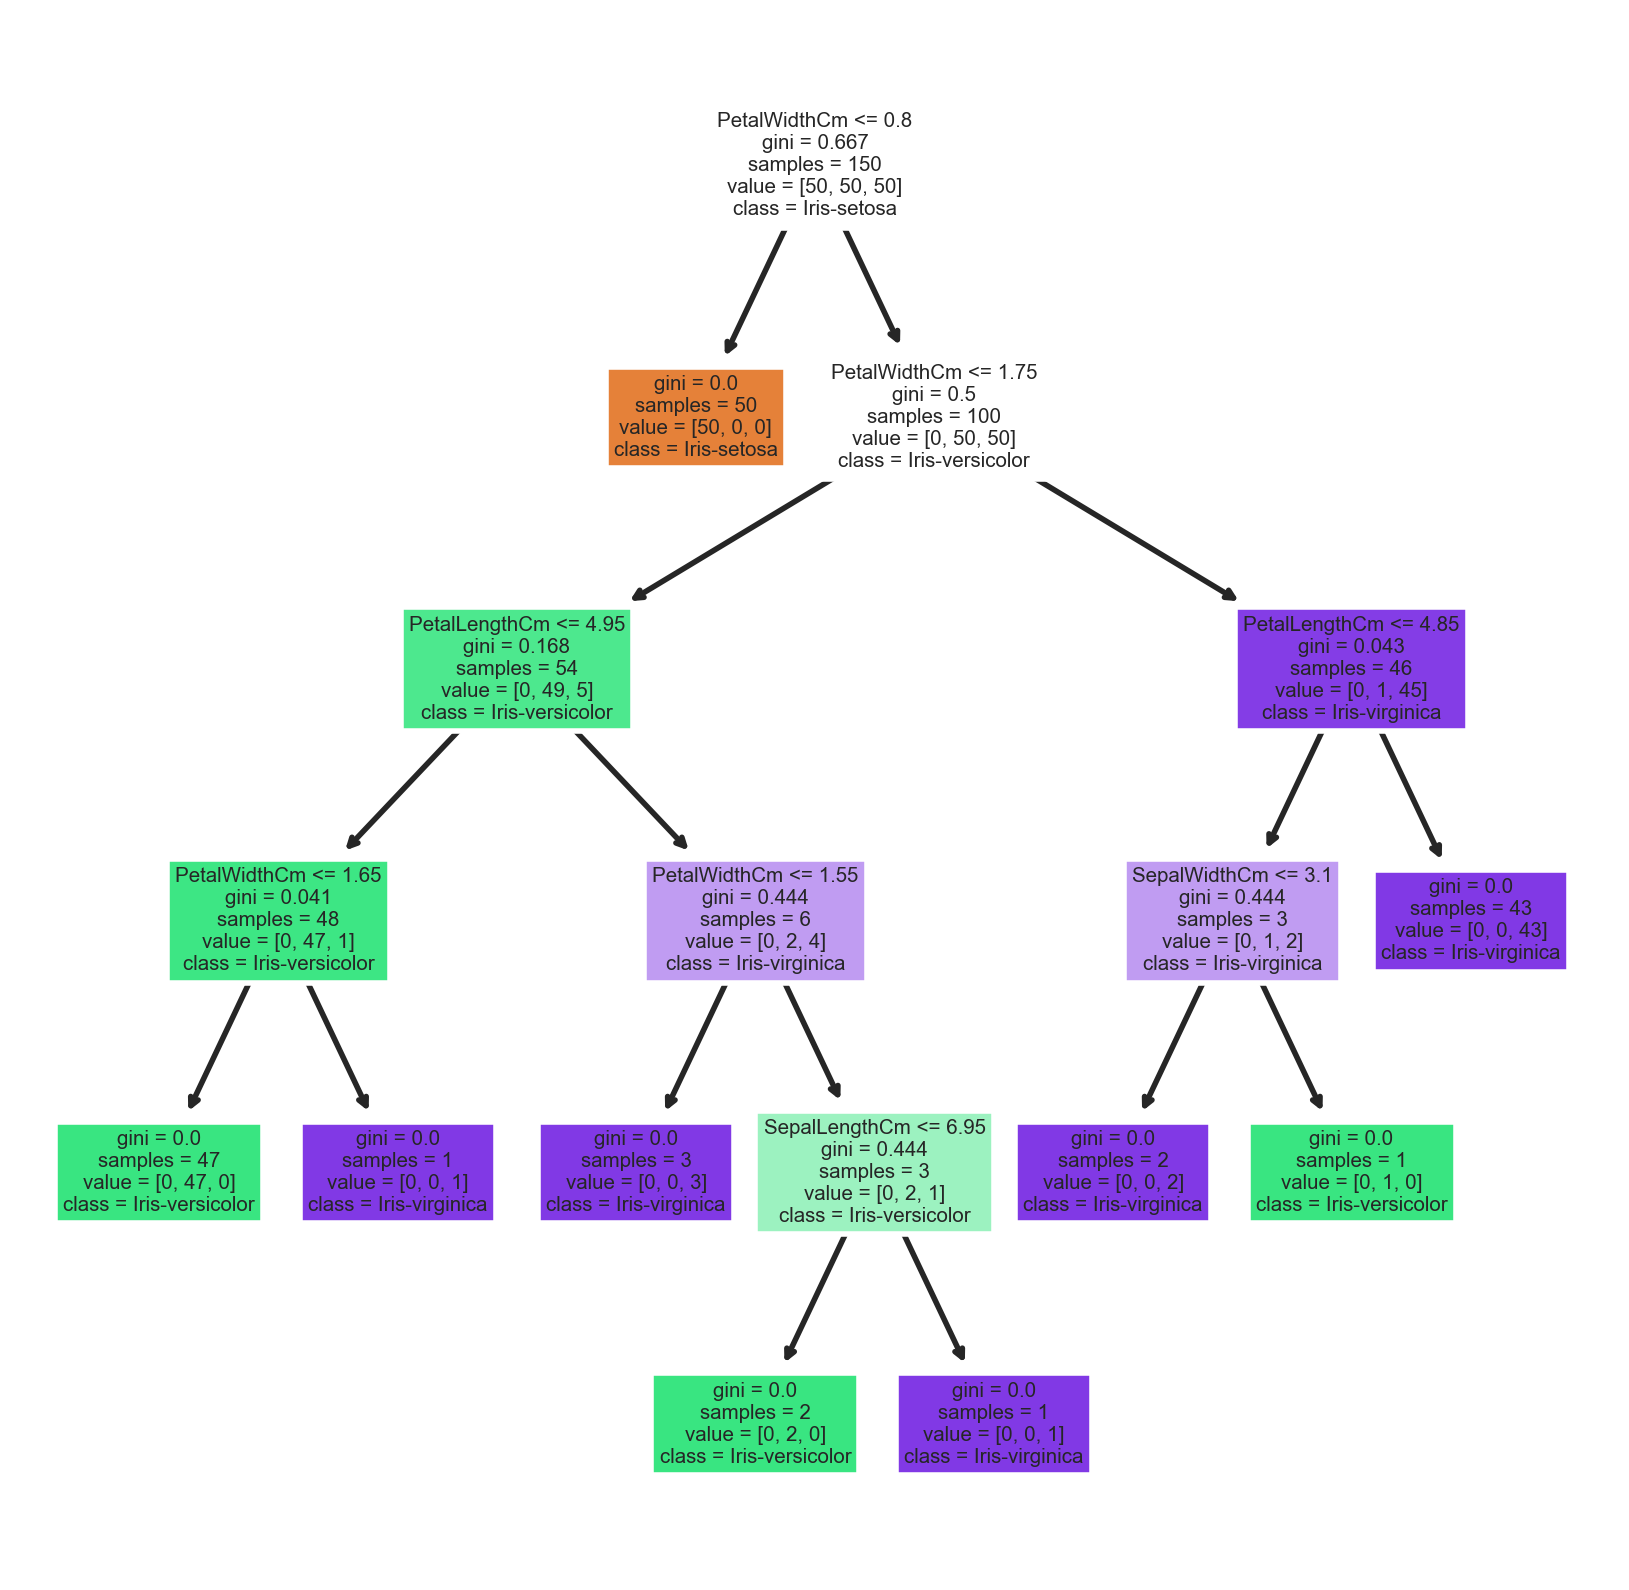

In [34]:
nd= ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']
lf= ['Iris-setosa','Iris-versicolor','Iris-virginica']
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(5,5),dpi=400)
tree.plot_tree(model,feature_names=nd,class_names=lf,filled=True)
fig.savefig('decisiontree.png')